# HMI down

In [ ]:
from setproctitle import setproctitle

setproctitle("HMI")

In [22]:
import os
import glob
import drms
from datetime import datetime, timedelta

In [2]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

In [3]:
year = 2011
month = 2
day = 14
hour = 19
minute = 55

start_time = datetime(year, month, day, hour, minute)
start_time

datetime.datetime(2011, 2, 14, 19, 55)

In [5]:
ar_mapping = client.query('hmi.Mharp_720s[][%sZ]' % start_time.isoformat('_', timespec='seconds'),
                           key=['NOAA_AR', 'HARPNUM'])
ar_mapping

,NOAA_AR,HARPNUM
0,11157,364
1,11156,367
2,0,369
3,11159,371
4,0,372
5,11158,377
6,0,378
7,0,380
8,0,381
9,11160,384


In [6]:
noaa_nums = [11158]

nums = []

if len(ar_mapping) !=0:
    for noaa_num in noaa_nums:
        harpnum = ar_mapping[ar_mapping['NOAA_AR'] == int(noaa_num)]['HARPNUM']
        if len(harpnum) > 0:
            num_dict = {'NOAA_AR':noaa_num, 'HARPNUM':harpnum.iloc[0]}
            nums.append(num_dict)

nums

[{'NOAA_AR': 11158, 'HARPNUM': 377}]

In [7]:
pick_num = nums[0]
pick_num

{'NOAA_AR': 11158, 'HARPNUM': 377}

In [8]:
download_dir = f"NOAA_{pick_num['NOAA_AR']}"
download_dir

'NOAA_11158'

In [9]:
series='sharp_cea_720s'
duration = '0.1h'
segments = 'Br, Bp, Bt'

ds = 'hmi.%s[%d][%s/%s]{%s}' % \
         (series, pick_num['HARPNUM'], start_time.isoformat('_', timespec='seconds'), duration, segments)
ds

'hmi.sharp_cea_720s[377][2011-02-14_19:55:00/0.1h]{Br, Bp, Bt}'

In [11]:
hmi_dir = os.path.join(download_dir, 'hmi')

In [12]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(hmi_dir, exist_ok=True)
download_result = r.download(hmi_dir)

Export request pending. [id=JSOC_20230711_1698, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1698, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1698, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1698, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1698, status=1]
Waiting for 5 seconds...
    record: hmi.sharp_cea_720s[377][2011.02.14_20:00:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110214_200000_TAI.Bp.fits
  -> NOAA_11158/hmi/hmi.sharp_cea_720s.377.20110214_200000_TAI.Bp.fits
    record: hmi.sharp_cea_720s[377][2011.02.14_20:00:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110214_200000_TAI.Bt.fits
  -> NOAA_11158/hmi/hmi.sharp_cea_720s.377.20110214_200000_TAI.Bt.fits
    record: hmi.sharp_cea_720s[377][2011.02.14_20:00:00_TAI]
  filename: hmi.sharp_cea_720s.377.20110214_200000_TAI.Br.fits
  -> NOAA_11158/hmi/hmi.sharp_cea_720s.377.20110214_200000_TAI.Br.fits


In [14]:
duration_hour = eval(duration.replace('h', ''))
duration_hour

0.1

In [15]:
end_time = start_time + timedelta(hours=duration_hour)
start_time, end_time

(datetime.datetime(2011, 2, 14, 19, 55), datetime.datetime(2011, 2, 14, 20, 1))

In [16]:
wavelength = 94
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2011-02-14_19:55:00 / 360.0s@60s][94]{image}'

In [17]:
aia94_dir = os.path.join(download_dir, 'aia94')

In [18]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia94_dir, exist_ok=True)
download_result = r.download(aia94_dir)

Export request pending. [id=JSOC_20230711_1703, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1703, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1703, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1703, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1703, status=1]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2011-02-14T19:55:02Z][94]
  filename: aia.lev1_euv_12s.2011-02-14T195504Z.94.image_lev1.fits
  -> NOAA_11158/aia94/aia.lev1_euv_12s.2011-02-14T195504Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2011-02-14T19:56:02Z][94]
  filename: aia.lev1_euv_12s.2011-02-14T195604Z.94.image_lev1.fits
  -> NOAA_11158/aia94/aia.lev1_euv_12s.2011-02-14T195604Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2011-02-14T19:57:02Z][94]
  filename: aia.lev1_euv_12s.2011-02-14T195704Z.94.image_lev1.fits
  -> NOAA_11158/aia94/aia.lev1_euv_12s.2011-02-14T195704Z.94.imag

In [19]:
wavelength = 171
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2011-02-14_19:55:00 / 360.0s@60s][171]{image}'

In [20]:
aia171_dir = os.path.join(download_dir, 'aia171')

In [21]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia171_dir, exist_ok=True)
download_result = r.download(aia171_dir)

Export request pending. [id=JSOC_20230711_1705, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1705, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1705, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1705, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1705, status=1]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2011-02-14T19:55:02Z][171]
  filename: aia.lev1_euv_12s.2011-02-14T195513Z.171.image_lev1.fits
  -> NOAA_11158/aia171/aia.lev1_euv_12s.2011-02-14T195513Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2011-02-14T19:56:02Z][171]
  filename: aia.lev1_euv_12s.2011-02-14T195613Z.171.image_lev1.fits
  -> NOAA_11158/aia171/aia.lev1_euv_12s.2011-02-14T195613Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2011-02-14T19:57:02Z][171]
  filename: aia.lev1_euv_12s.2011-02-14T195713Z.171.image_lev1.fits
  -> NOAA_11158/aia171/aia.lev1_euv_12s.2011-02-14T1957

In [23]:
from sunpy.map import Map
import matplotlib.pyplot as plt

In [24]:
hmi_r = glob.glob(os.path.join(hmi_dir, '*200000_TAI.Br.fits'))[0]
hmi_r

'NOAA_11158/hmi/hmi.sharp_cea_720s.377.20110214_200000_TAI.Br.fits'

In [25]:
r_map = Map(hmi_r)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


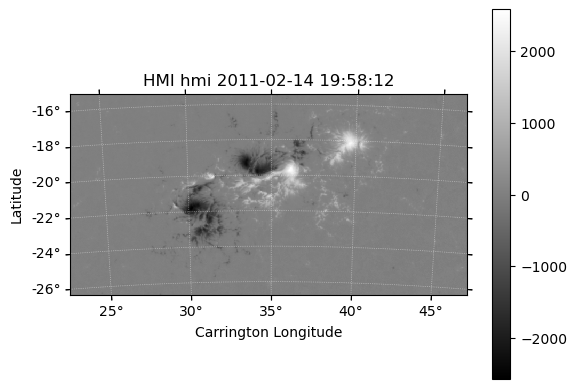

In [26]:
r_map.peek()

In [27]:
ref_wcs = r_map.wcs
ref_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'CRLN-CEA'  'CRLT-CEA'  
CRVAL : 34.8404427  -21.0769005  
CRPIX : 372.5  189.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0299999993  0.0299999993  
NAXIS : 744  377

In [28]:
def aia_draw(path, ref_wcs, wavelength):
    aia_map = Map(path)
    aia_map.peek()
    obstime = aia_map.observer_coordinate.obstime
    obstime.format = 'iso'
    aia_repro_map = aia_map.reproject_to(ref_wcs)

    fig = plt.figure()
    ax = fig.add_subplot(projection=aia_repro_map)
    aia_repro_map.plot(axes=ax)
    plt.colorbar()
    plt.title(f"AIA {wavelength} Å {obstime.value}")
    plt.show()

In [29]:
aia171 = glob.glob(os.path.join(aia171_dir, '*2000*'))[0]
aia171

'NOAA_11158/aia171/aia.lev1_euv_12s.2011-02-14T200013Z.171.image_lev1.fits'

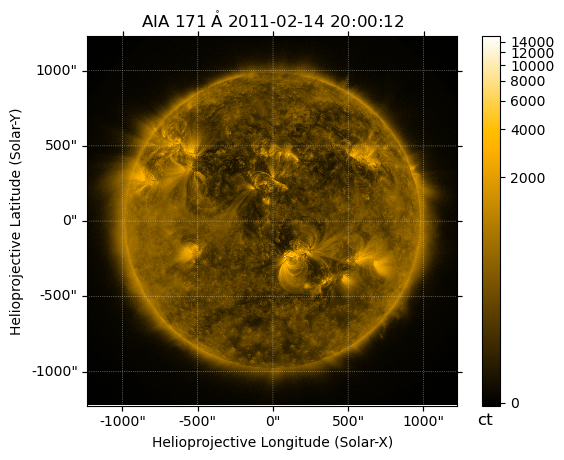

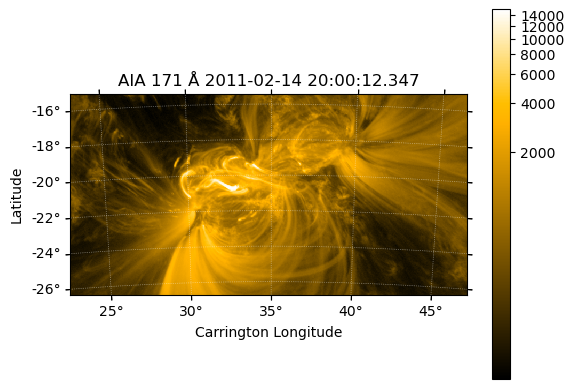

In [30]:
aia_draw(aia171, ref_wcs, '171')

In [31]:
aia94 = glob.glob(os.path.join(aia94_dir, '*2000*'))[0]
aia94

'NOAA_11158/aia94/aia.lev1_euv_12s.2011-02-14T200004Z.94.image_lev1.fits'

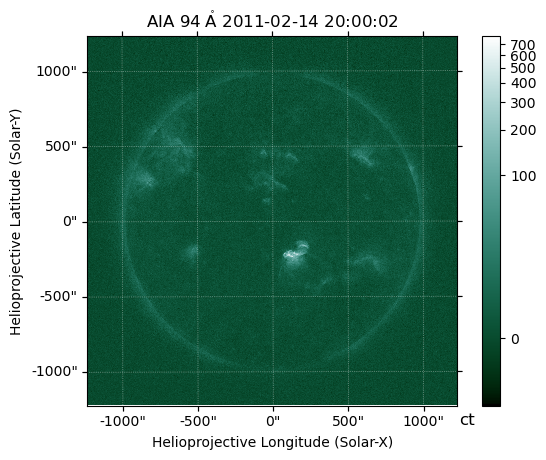

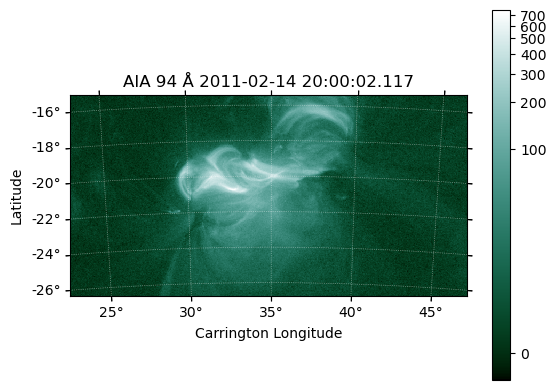

In [32]:
aia_draw(aia94, ref_wcs, '94')